# Una Introducción a Pandas

Esta libreta es una modificación (sin muchos cambios) de la introducción a Pandas realizada por Julians Evans y que se encuentra dentro de la (documentación oficial de Pandas)[https://github.com/jvns/pandas-cookbook], Unas cosas se redujeron, y otras se dejaron en forma de ejercicios para practicar diferentes cosas.

In [6]:
# Figuras en linea
import matplotlib
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 5)      # Tamaño de las gráficas

matplotlib.style.use('ggplot')



# 1. Un ejemplo con bicicletas

## 1.1 Leyendo datos de un archivo csv

Para leer archivos CSV, se utiliza la función `read_csv`. Por default se asume la coma como el indicador de separación. Vamos a ver un conjunto de datos sobre [ciclistas en la ciudad de Montreal](http://donnees.ville.montreal.qc.ca/dataset/velos-comptage). Los cuales se encuentran ya descargados. Esta base de datos describe la cantidad de ciclistas que transitaron por 7 diferentes rutas por día.

In [7]:
broken_df = pd.read_csv('bikes.csv')

In [8]:
# Vamos a ver las 3 primeras entradas
broken_df[:3]

,Date;Berri 1;Br�beuf (donn�es non disponibles);C�te-Sainte-Catherine;Maisonneuve 1;Maisonneuve 2;du Parc;Pierre-Dupuy;Rachel1;St-Urbain (donn�es non disponibles)
0,01/01/2012;35;;0;38;51;26;10;16;
1,02/01/2012;83;;1;68;153;53;6;43;
2,03/01/2012;135;;2;104;248;89;3;58;


Ups! Así, los datos no son útiles. Afortunadamente, `read_csv` viene con un montón de opciones para ajustarse a los diferentes archivos CSV. En particular es necesario:

* cambiar el indicador de columna por  `;`
* Cambiar la codificación por `'latin1'` (por default es `'utf8'`)
* Transformar los datos de la columna `Date` a algun tipo estandar `datetime`  
* Avisar que el estilo de los datos es francés (como en español) esto es día/mes/año
* Hacer que el índice sea la columna `Date`

In [9]:
fixed_df = pd.read_csv('bikes.csv', sep=';', encoding='latin1', parse_dates=['Date'], dayfirst=True, index_col='Date')
fixed_df[:3]

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN


In [10]:
fixed_df.describe()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
count,310.000000,0,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,0
mean,2985.048387,NaN,1233.351613,1983.325806,3510.261290,1862.983871,1054.306452,2873.483871,NaN
std,2169.271062,NaN,944.643188,1450.715170,2484.959789,1332.543266,1064.029205,2039.315504,NaN
min,32.000000,NaN,0.000000,33.000000,47.000000,18.000000,0.000000,0.000000,NaN
25%,596.000000,NaN,243.250000,427.000000,831.000000,474.750000,53.250000,731.000000,NaN
50%,3128.000000,NaN,1269.000000,2019.500000,3688.500000,1822.500000,704.000000,3223.500000,NaN
75%,4973.250000,NaN,2003.000000,3168.250000,5731.750000,3069.000000,1818.500000,4717.250000,NaN
max,7077.000000,NaN,3124.000000,4999.000000,8222.000000,4510.000000,4386.000000,6595.000000,NaN


## 1.2 Seleccionar columnas

In [11]:
fixed_df['Berri 1']

Date
2012-01-01      35
2012-01-02      83
2012-01-03     135
2012-01-04     144
2012-01-05     197
2012-01-06     146
2012-01-07      98
2012-01-08      95
2012-01-09     244
2012-01-10     397
2012-01-11     273
2012-01-12     157
2012-01-13      75
2012-01-14      32
2012-01-15      54
2012-01-16     168
2012-01-17     155
2012-01-18     139
2012-01-19     191
2012-01-20     161
2012-01-21      53
2012-01-22      71
2012-01-23     210
2012-01-24     299
2012-01-25     334
2012-01-26     306
2012-01-27      91
2012-01-28      80
2012-01-29      87
2012-01-30     219
              ... 
2012-10-07    1580
2012-10-08    1854
2012-10-09    4787
2012-10-10    3115
2012-10-11    3746
2012-10-12    3169
2012-10-13    1783
2012-10-14     587
2012-10-15    3292
2012-10-16    3739
2012-10-17    4098
2012-10-18    4671
2012-10-19    1313
2012-10-20    2011
2012-10-21    1277
2012-10-22    3650
2012-10-23    4177
2012-10-24    3744
2012-10-25    3735
2012-10-26    4290
2012-10-27    1857
2012-10

## 1.3 Graficar datos

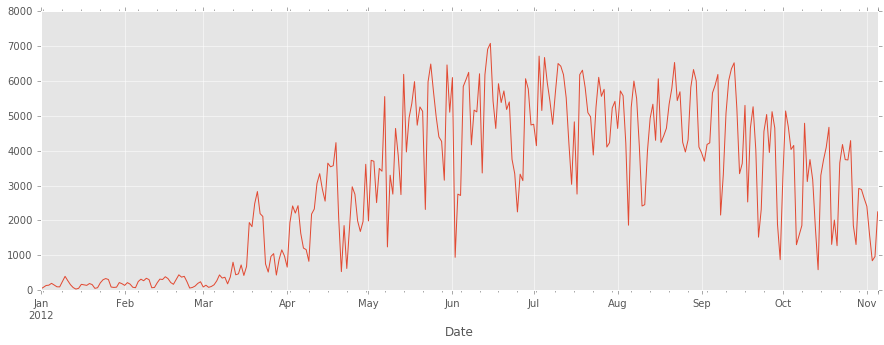

In [12]:
fixed_df['Berri 1'].plot()

Igualmente se pueden graficar todos los días al mismo tiempo. Para ver mejor habrá que hacer un poco más grande la figura. Si bien es poco lo que se puede sacar de conclusión en este gráfico, se puede observar que el comportamiento de todos los caminos son más o menos parecidos. Igualmente, por las estacones, podríamos asociar de alguna manera el comportaiento de los ciclistas con el clima.

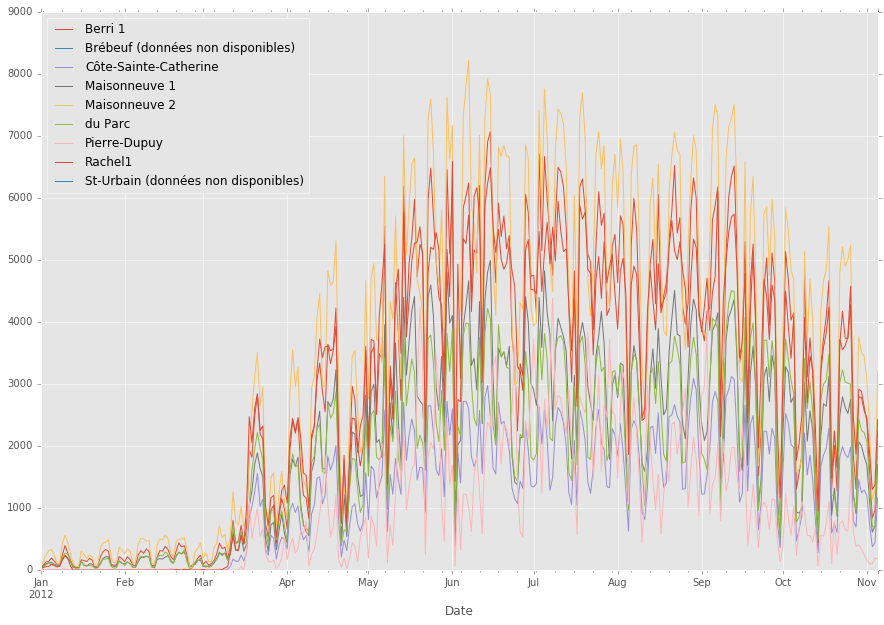

In [13]:
fixed_df.plot(figsize=(15, 10))

### Ejercicio: Grafica 3 rutas únicamente desde la entrada 130 a la 160 (los días del verano)

In [ ]:
# Escribe aquí tu código

## 1.4 Extraer una columna y transformar el índice (fecha)

Supongamos ahora que tenemos la siguiente pregunta ¿Que día de la semana la gente circula más por el trayecto *Berri 1* (una ciclovía al lado de una calle principal de Montreal). Bueno, lo que tendríamos que hacer es extraer la columna que nos interesa como un nuevo *DataFrame* y luego agregarle una nueva variable como es el día de la semana.

Primero copiemos físicamente la coluna que nos interesa

In [ ]:
berri_bikes = fixed_df[['Berri 1']].copy()
berri_bikes.head()

Ahora tenemos que malipular las fechas, las cuales se encuentran en el índice del *DataFrame*

In [ ]:
berri_bikes.index

Curioso que lo que se registró solo llego hasta el 5 de noviembre del 2012 ¿Verdad? Ahora podemos usar las facilidades que nos dá Pandas para manipular fechas. Por ejemplo, si queremos el día del mes:

In [ ]:
berri_bikes.index.day

y si queremos el día de la semana:

In [ ]:
berri_bikes.index.weekday

Ahora agregamos una nueva variable a nuestro *DataFrame* de manera bastante intuitiva

In [ ]:
berri_bikes.loc[:, u'Día de la semana'] = berri_bikes.index.weekday
berri_bikes.head()

## 1.5 Agregación de información

Ahora nos falta agregar la información, y para eso vamos a utilizar el método `.groupby` de la clase *DataFrame*, el cual es muy parecido al que se usa en SQL. Veamos como se utiliza en forma básica, pero revisa la [documentación](http://pandas.pydata.org/pandas-docs/stable/groupby.html), ya que es una herramienta muy poderosa para el análisis y tratamiento de los datos.

In [ ]:
paseos_por_dia = berri_bikes.groupby(u'Día de la semana').aggregate(sum)
paseos_por_dia

¿Días de la semana de 0 a 6? Eso no tiene mucho sentido si queremos seguir usando esta información para análisis posteriores. Es una buena práctica procurar que todas las columnas tengan nombres significativos, y que los valores se codifiquen de una manera que sean claros.

In [ ]:
paseos_por_dia.index = ['Lunes', 'Martes', u'Miércoles', 'Jueves', 'Viernes', u'Sábado', 'Domingo']
paseos_por_dia

¡Mejor! Y mucho mejor si lo visualizamos como una gráfica:

In [ ]:
paseos_por_dia.plot(kind='bar')

Alguien podría argumentar que las cuentas totales no es la mejor manera que representar lo que pasa en cada día, porque la variabilidad podría ser factor importante. Como la observación nos parece válida, hagámos el análisis de otra manera.

In [ ]:
berri_bikes.replace({u'Día de la semana': {0:'Lunes', 1:'Martes', 2:u'Miércoles', 3:'Jueves', 
                                           4:'Viernes', 5:u'Sábado', 6:'Domingo'}}, inplace=True)

berri_bikes.boxplot(column=u'Berri 1', by=u'Día de la semana', 
                    positions= [7, 4, 1, 2, 3, 6, 5])         # Las posiciones es para mantener el orden alfabético



Estas gráficas se conocen como *Box Plots* y son muy útiles para visualizar la distribución de datos. La línea roja representa la mediana (o quantil 50) la cajita es el rango en que se encuentran el 90% de los valores, y las líneas representan los valores mínimos y máximos.

### Ejercicio: Responde a la pregunta ¿Que tanto sale la gente a andar en bicicleta por Montreal por més del año en el 2012?

In [ ]:
# Agrega todo tu código aqui, no es necesario hacerlo por partes

# 2. Ahora un ejercicio con el clima en Montreal

## 2.1 Obteniendo datos de la red

Ahora vamos a revisar el clima en el mismo año del 2012 en Montreal. Así que vamos a accesar al sitio que guarda la
[información histórica del clima en Canada](http://climate.weather.gc.ca/index_e.html#access), y vamos a obtener la información del mes de marzo del 2012 (revisa el sitio si quieres ver como se determinó el *request*.

In [ ]:
# Para obtener strings con formato, donde va un valor a ser sustituido se pone entre llaves
# como en url_template para {year} y para {month}

url_template = "http://climate.weather.gc.ca/climateData/bulkdata_e.html?format=csv&stationID=5415&Year={year}&Month={month}&timeframe=1&submit=Download+Data"
url = url_template.format(month=3, year=2012)

clima_mar2012 = pd.read_csv(url, skiprows=15, index_col='Date/Time', 
                              parse_dates=True, encoding='latin1')

clima_mar2012.head(10)

Muy interesante que para descargar datos de internet se utilice exactamente la misma función que para abrir un archivo local. Otra cosa importante es que sabíamos bastantes cosas del conjunto de datos, como que los primeros 15 renglones del archivo serín metadatos que no nos interesan, que esta codificado en `latin1`, y que l primer columna es de tipo `DateTime` con un formato estandar.

Ahora queda modificar el nombre de las variables para que tengan sentido para nosotros: 

In [ ]:
clima_mar2012.columns = [
    u'Año', u'Mes', u'Dia', u'Hora', u'Calidad del dato', u'Temp (C)', 
    u'Temp Flag', u'Temp. de punto de rocío (C)', u'Temp. de punto de rocío Flag', 
    u'Humedad relativa (%)', u'Humedad relativa Flag', u'Dirección viento (10s deg)', u'Dirección viento Flag', 
    u'Velocidad viento (km/h)', u'Velocidad viento Flag', u'Visibilidad (km)', u'Visibilidad Flag',
    u'Presión ambiental (kPa)', u'Presión ambiental Flag', u'Hmdx', u'Hmdx Flag', u'Factor de viento', 
    u'Factor de viento Flag', u'Clima']

clima_mar2012.describe()

## 2.2 Reducción de los datos

Como podemos ver, varias de las columnas tienen puros valores tipo `NaN`, que en Pandas significa que el valor es faltante. Por el momento estas columnas vamos a eliminarlas de un tajo utilizando la función `dropna`.

Igualmente, si el índice ya incluye fecha y hora, las columnas extras que representan Año, mes, día y hora pues son redundantes y también los vamos a eliminar, utilizando la función `drop`. Igualmente para la columna de calidad del dato que no parece tener información relevante. En ambos casos usamos la opción `axix=1` lo que significa que solamente queremos eliminar columnas.

In [ ]:
clima_mar2012 = clima_mar2012.dropna(axis=1, how='any')
clima_mar2012 = clima_mar2012.drop([u'Año', u'Mes', u'Dia', u'Hora', u'Calidad del dato'], axis=1)
clima_mar2012.head(10)

y ahora solo para ver que es lo que pasa, vamos a revisar la temperatura promedio por hora del día durante todo el més de marzo de 2012.

In [ ]:
temperatura = clima_mar2012[[u'Temp (C)']].copy()
temperatura.loc[:, u'Hora'] = clima_mar2012.index.hour
temperatura.groupby(u'Hora').aggregate(np.mean).plot()

## 2.3 Obteniendo y combinando archivos históricos

Ahora el objetivo es descargar los datos del clima a lo largo de todo el 2012. Para esto vamos a hacer una función en python que nos permita automatizar la tarea. 


In [ ]:
def descarga_mensual(year, month):
    if month == 1:
        year += 1
    url = url_template.format(year=year, month=month)
    df = pd.read_csv(url, skiprows=15, index_col='Date/Time', parse_dates=True)
    df = df.dropna(axis=1)
    df = df.drop(['Year', 'Day', 'Month', 'Time', 'Data Quality'], axis=1)
    return df

La función tiene un detallito, que es que cuando se pide el mes de enero, hay que pedirlo de un año adelante porque si no, pues nos regresa la información del mes pasado. Esto es un error del sistema canadiense de datos históricos de clima.

Con esto, podemos recoger todos los meses en una lista de `DataFrames` y luego concatenarlas en el sentido de los renglones:

In [ ]:
lista_meses = [descarga_mensual(2012, mes) for mes in range(1, 13)]
clima2012 = pd.concat(lista_meses)
clima2012.columns = [u'Temp (C)', u'Temp. de punto de rocío (C)',  u'Humedad relativa (%)', 
                     u'Velocidad viento (km/h)',  u'Visibilidad (km)', u'Factor de viento', u'Clima']

clima2012.describe()

Tenemos 8784 entradas, que para no volver a tener que leer de internet vamos a guardar en nuestro propio archivo CSV.

In [ ]:
clima2012.to_csv('../data/clima2012.csv', encoding='latin1')

## 2.4 Operaciones con cadenas de caracteres

Vamos ahora a graficar la temperatura promedio mensual, utilizando el método `resample`:

In [ ]:
clima2012['Temp (C)'].resample('M', how=np.mean).plot(kind='bar')

Y ahora quisieramos poder visualizar si la temperatura tiene un comportamiento parecido al número de veces que nevó en un mes (claro, en este caso es algo bastante obvio, ya que es un ejemplo ilustrativo).

Para esto, vamos a utilizar la columna Clima de nuestro `DataFrame`, en la cual, en cada momento, hay información en forma de cadenas de caracteres con las situaciones que se presentaron (niebla, lluvia, nieve, ...). Para esto utilizaremos el método `str.contains`, el cual devuelve `True` en caso que la cadena de caracteres se encuentre el el `DataFrame`. Sin embargo, si queremos saber el número de veces que nevó en un mes, es necesario convertir esa variable booleana en una variable numerica (flotante). Para eso utilizaremos el comando `astype`. Vamos a ponerlo todo en una sola linea.

In [ ]:
nevando = clima2012[u'Clima'].str.contains('Snow').astype(float).resample('M', how=np.mean)

Y ahora los ponemos junto a la temperatura para hacer una gráfica conjunta.

In [ ]:
temperatura = clima2012[u'Temp (C)'].resample('M', how=np.mean)
temperatura.name = "Temperatura promedio mensual (C)"
nevando.name = "Porcentaje de horas nevando al mes"

pd.concat([temperatura, nevando], axis=1).plot(kind='bar', subplots=True, figsize=(15, 10))

### Ejercicio: Verifica si la lluvia tiene alguna relación con la velocidad del viento, o con la humedad relativa 

In [ ]:
# Escribe aqui tu código

### Ejercicio: Mezcla las bases de clima y la de las bicicletas, para revisar si hay alguna relación entre alguna variable climática y el uso de la bicicleta como medio de transporte

In [ ]:
# Escribe aqui tu código